In [1]:
#import data into d
import pandas as pd
import csv
with open('hepatitis.data') as f:
    reader = csv.reader(f,delimiter=",")
    d = list(reader)
names = ['Class', 'Age','Sex','Steroid','Antivirals','Fatigue',
            'Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable',
            'Spiders','Ascities','Varices','Bilirubin','Alk Phosphate',
            'SGOT','Albumin','Protime','Histology']

for x in range(0,len(d)):
    d[x]=pd.to_numeric(d[x],errors='coerce')
dataFrame=pd.DataFrame(data=d,columns=names)

In [2]:
#get rid of any nan
import numpy as np
bili=[]
alkP=[]
sgot=[]
for x in range(0,len(dataFrame)):
    if (not np.isnan(dataFrame['Bilirubin'][x])):
        bili.append(dataFrame['Bilirubin'][x])
    if (not np.isnan(dataFrame['Alk Phosphate'][x])):   
        alkP.append(dataFrame['Alk Phosphate'][x])
    if (not np.isnan(dataFrame['SGOT'][x])):
        sgot.append(dataFrame['SGOT'][x])

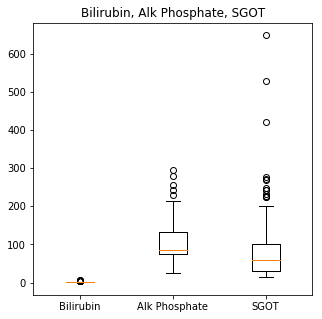

In [3]:
#print boxplots
import matplotlib.pyplot as plt
import numpy as np
data=[bili,alkP,sgot]
# Create a figure instance
fig = plt.figure(1, figsize=(5,5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data)
ax.set_xticklabels(['Bilirubin', 'Alk Phosphate','SGOT'])
#ax.set_ylabel('')
ax.set_title('Bilirubin, Alk Phosphate, SGOT')
#plt.ylim(0, 100)
plt.show()

All three attributes contain variables, according to the boxplot above. Remove all tuples with values greater than Q3+1.5*(iqr) or less than Q1-1.5*(iqr)

In [4]:
#Identify outliers and justify
#remove entire tuples with outliers
#ALL THREE contains errors

print(len(dataFrame))
for x in range(0, len(dataFrame)):
    if (dataFrame['Bilirubin'][x]>np.percentile(bili, 75)+1.5*(np.percentile(bili, 75)-np.percentile(bili, 25))
       or dataFrame['Bilirubin'][x]<np.percentile(bili, 25)-1.5*(np.percentile(bili, 75)-np.percentile(bili, 25))):
        dataFrame=dataFrame.drop(x)
        
    elif(dataFrame['Alk Phosphate'][x]>np.percentile(alkP, 75)+1.5*(np.percentile(alkP, 75)-np.percentile(alkP, 25))
        or dataFrame['Alk Phosphate'][x]<np.percentile(alkP, 25)-1.5*(np.percentile(alkP, 75)-np.percentile(alkP, 25))):
        dataFrame=dataFrame.drop(x)
        
    elif(dataFrame['SGOT'][x]>np.percentile(sgot, 75)+1.5*(np.percentile(sgot, 75)-np.percentile(sgot, 25))
        or dataFrame['SGOT'][x]<np.percentile(sgot, 25)-1.5*(np.percentile(sgot, 75)-np.percentile(sgot, 25))):
        dataFrame=dataFrame.drop(x)
        
print(len(dataFrame))

155
122


In [5]:
#reset dataFrame index values
dataFrame.index=range(0,len(dataFrame))

In [6]:
#replace nan with mode/mean
import numpy as np
from scipy import stats
from statistics import mode
for x in range(0,len(dataFrame)):
    if (np.isnan(dataFrame['Class'][x])):
        print(mode(dataFrame['Class']))
        dataFrame['Class'][x]=mode(dataFrame['Class'])
    if (np.isnan(dataFrame['Age'][x])):
        dataFrame['Age'][x]=np.mean(dataFrame['Age'])
    if (np.isnan(dataFrame['Sex'][x])):
        dataFrame['Sex'][x]=mode(dataFrame['Sex'])
    if (np.isnan(dataFrame['Steroid'][x])):
        dataFrame['Steroid'][x]=mode(dataFrame['Steroid'])
    if (np.isnan(dataFrame['Antivirals'][x])):
        dataFrame['Antivirals'][x]=mode(dataFrame['Antivirals'])
    if (np.isnan(dataFrame['Fatigue'][x])):
        dataFrame['Fatigue'][x]=mode(dataFrame['Fatigue'])
    if (np.isnan(dataFrame['Malaise'][x])):
        dataFrame['Malaise'][x]=mode(dataFrame['Malaise'])
    if (np.isnan(dataFrame['Anorexia'][x])):
        dataFrame['Anorexia'][x]=mode(dataFrame['Anorexia'])
    if (np.isnan(dataFrame['Liver Big'][x])):
        dataFrame['Liver Big'][x]=mode(dataFrame['Liver Big'])
    if (np.isnan(dataFrame['Liver Firm'][x])):
        dataFrame['Liver Firm'][x]=mode(dataFrame['Liver Firm'])
    if (np.isnan(dataFrame['Spleen Palpable'][x])):
        dataFrame['Spleen Palpable'][x]=mode(dataFrame['Spleen Palpable'])
    if (np.isnan(dataFrame['Spiders'][x])):
        dataFrame['Spiders'][x]=mode(dataFrame['Spiders'])
    if (np.isnan(dataFrame['Ascities'][x])):
        dataFrame['Ascities'][x]=mode(dataFrame['Ascities'])
    if (np.isnan(dataFrame['Varices'][x])):
        dataFrame['Varices'][x]=mode(dataFrame['Varices'])
    if (np.isnan(dataFrame['Bilirubin'][x])):
        dataFrame['Bilirubin'][x]=np.mean(dataFrame['Bilirubin'])
    if (np.isnan(dataFrame['Alk Phosphate'][x])):
        dataFrame['Alk Phosphate'][x]=np.mean(dataFrame['Alk Phosphate'])
    if (np.isnan(dataFrame['SGOT'][x])):
        dataFrame['SGOT'][x]=np.mean(dataFrame['SGOT'])
    if (np.isnan(dataFrame['Albumin'][x])):
        dataFrame['Albumin'][x]=np.mean(dataFrame['Albumin'])
    if (np.isnan(dataFrame['Protime'][x])):
        dataFrame['Protime'][x]=np.mean(dataFrame['Protime'])
    if (np.isnan(dataFrame['Histology'][x])):
        dataFrame['Histology'][x]=mode(dataFrame['Histology'])
print('Class',mode(dataFrame['Class']))
print('Age',np.mean(dataFrame['Age']))
print('Sex',mode(dataFrame['Sex']))
print('Steroid',mode(dataFrame['Steroid']))
print('Antivirals',mode(dataFrame['Antivirals']))
print('Fatigue',mode(dataFrame['Fatigue']))
print('Malaise',mode(dataFrame['Malaise']))
print('Anorexia',mode(dataFrame['Anorexia']))
print('Liver Big',mode(dataFrame['Liver Big']))
print('Liver Firm',mode(dataFrame['Liver Firm']))
print('Spleen Palpable',mode(dataFrame['Spleen Palpable']))
print('Spiders',mode(dataFrame['Spiders']))
print('Ascities',mode(dataFrame['Ascities']))
print('Varices',mode(dataFrame['Varices']))
print('Bilirubin',np.mean(dataFrame['Bilirubin']))
print('Alk Phosphate',np.mean(dataFrame['Alk Phosphate']))
print('SGOT',np.mean(dataFrame['SGOT']))
print('Albumin',np.mean(dataFrame['Albumin']))
print('Protime',np.mean(dataFrame['Protime']))
print('Histology',mode(dataFrame['Histology']))

Class 2.0
Age 40.5
Sex 1.0
Steroid 2.0
Antivirals 2.0
Fatigue 1.0
Malaise 2.0
Anorexia 2.0
Liver Big 2.0
Liver Firm 2.0
Spleen Palpable 2.0
Spiders 2.0
Ascities 2.0
Varices 2.0
Bilirubin 1.013793103448276
Alk Phosphate 93.49494949494947
SGOT 61.8135593220339
Albumin 3.9119266055045867
Protime 64.29577464788723
Histology 1.0


In [7]:
#create tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()

classes=dataFrame['Class']

learningData=dataFrame.drop('Class',axis=1)

clf = clf.fit(learningData, classes)

In [8]:
#names of attributes for tree
featureNames=['Age','Sex','Steroid','Antivirals','Fatigue',
            'Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable',
            'Spiders','Ascities','Varices','Bilirubin','Alk Phosphate',
            'SGOT','Albumin','Protime','Histology']

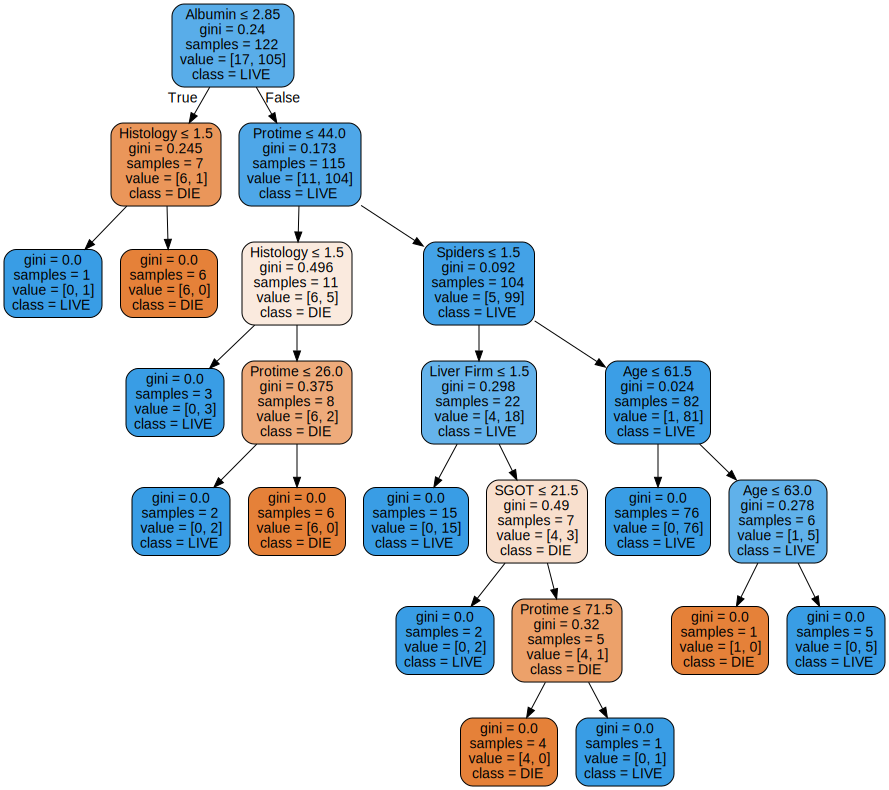

In [10]:
#print tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Class") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=featureNames,  
                         class_names=['DIE','LIVE'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [54]:
#TEST TREE
numK=10
for x in range(0,numK):
    trueDie=0
    falseDie=0
    trueLive=0
    falseLive=0
    length=int(len(dataFrame)*(1/numK))
    for y in range(int(len(learningData)*(x/10)),int(len(learningData)*(x+1)/10)):
        predicted=clf.predict(learningData.loc[[y]])[0]
        if (dataFrame['Class'][y]==1.0 and predicted==1.0):
            trueDie+=1
        elif(dataFrame['Class'][y]==1.0 and predicted==2.0):
            falseDie+=1
        elif(dataFrame['Class'][y]==2.0 and predicted==1.0):
            falseLive+=1
        elif(dataFrame['Class'][y]==2.0 and predicted==2.0):
            trueLive+=1
    print(x+1,'k fold results')
    print('actual:     Die   Live')
    print('predict: die ',trueDie,'   ',falseDie)
    print('predict: live',falseLive,'   ',trueLive)
    print('error rate= ',(falseLive+falseDie)/length)
    print('')
    


1 k fold results
actual:     Die   Live
predict: die  1     0
predict: live 0     11
error rate=  0.0

2 k fold results
actual:     Die   Live
predict: die  0     0
predict: live 0     12
error rate=  0.0

3 k fold results
actual:     Die   Live
predict: die  2     0
predict: live 0     10
error rate=  0.0

4 k fold results
actual:     Die   Live
predict: die  0     0
predict: live 0     12
error rate=  0.0

5 k fold results
actual:     Die   Live
predict: die  0     0
predict: live 0     13
error rate=  0.0

6 k fold results
actual:     Die   Live
predict: die  0     0
predict: live 0     12
error rate=  0.0

7 k fold results
actual:     Die   Live
predict: die  4     0
predict: live 0     8
error rate=  0.0

8 k fold results
actual:     Die   Live
predict: die  5     0
predict: live 0     7
error rate=  0.0

9 k fold results
actual:     Die   Live
predict: die  1     0
predict: live 0     11
error rate=  0.0

10 k fold results
actual:     Die   Live
predict: die  4     0
predict: liv